<a href="https://colab.research.google.com/github/devadlakha711/SpamOut/blob/main/SPAMOUT-%3ESMS_SPAM_CLASSIFIER_DEVMLPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('SPAM.csv',encoding='latin1')

In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# drop last 3 columns kyuki unme bahot hi kam non null values hain
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2
1362,ham,What does the dance river do?
4956,ham,I'm vivek:)i got call from your number.
759,ham,"Call me when you/carlos is/are here, my phone'..."
545,ham,Then any special there?
4760,ham,It's Ì© only $140 ard...Ìä rest all ard $180 a...


In [ ]:
# renaming the columns as v1 and v2 bahot descriptive nahi hain
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,transformed_text,text_length
0,0,go jurong point crazi avail bugi n great world...,76
1,0,ok lar joke wif u oni,21
2,1,free entri 2 wkli comp win fa cup final tkt 21...,127
3,0,u dun say earli hor u c alreadi say,35
4,0,nah think goe usf live around though,36


In [ ]:
#as vahan ham aur spam likha hai mai label encoder import kar raha hoon
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])
df.sample(5)

,target,text
1257,0,Am also doing in cbe only. But have to pay.
5554,0,Well keep in mind I've only got enough gas for...
4431,0,Dont think you need yellow card for uk travel....
3541,0,ÌÏ come lt 25 n pass to me lar
4033,0,Wot u up 2? Thout u were gonna call me!! Txt b...


In [ ]:
#missing values kei liye check
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
#no null values found
#duplicates kei liye check
df.duplicated().sum()

403

In [ ]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
#no further duplicates
df.shape

(5169, 2)

In [ ]:
#understanding data
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

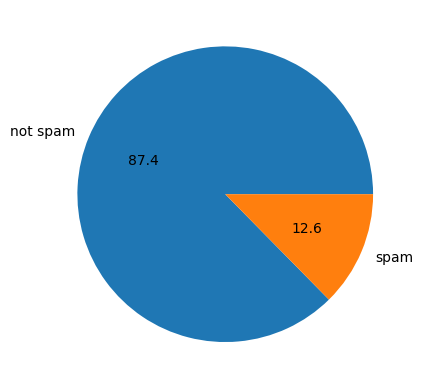

In [ ]:
#checking percentage of data outputs
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['not spam','spam'],autopct="%0.1f")
plt.show()

In [ ]:
#imbalanced as not spam are much more than spam
#using natural language toolkit to find number of characters, words and sentences
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#adding a col which contains number of characters
df['num_characters'] = df['text'].apply(len)
df.sample(5)

,target,text,num_characters
2403,0,Jesus christ bitch I'm trying to give you drug...,73
5287,0,Hey ! Don't forget ... You are MINE ... For ME...,113
882,0,I love to give massages. I use lots of baby oi...,78
4536,0,Normally i use to drink more water daily:),42
1697,0,Hai priya are you right. What doctor said pa. ...,60


In [ ]:
#similarly with words
df['text'].apply(lambda x:nltk.word_tokenize(x))
#each sentence is broken into words

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [ ]:
#make a column out of it now
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.sample(5)

,target,text,num_characters,num_words
1923,0,Hello. They are going to the village pub at 8 ...,91,21
4068,0,Hope youåÕre not having too much fun without m...,76,17
3543,0,Lol ok ill try to send. Be warned Sprint is de...,84,20
980,0,If he started searching he will get job in few...,87,17
1558,0,Message from . I am at Truro Hospital on ext. ...,97,25


In [ ]:
#number of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.sample(5)

,target,text,num_characters,num_words,num_sentences
2986,0,"I'm there and I can see you, but you can't see...",96,26,3
1761,0,Got ur mail Dileep.thank you so muchand look f...,205,38,1
4690,0,Surly ill give it to you:-) while coming to re...,51,14,1
5207,0,"Babe, I'm answering you, can't you see me ? Ma...",109,29,4
703,0,"Thats a bit weird, even ?- where is the do sup...",109,28,2


In [ ]:
#checking mean number of char/words/sentences for whole data
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#for not spam
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
#for spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

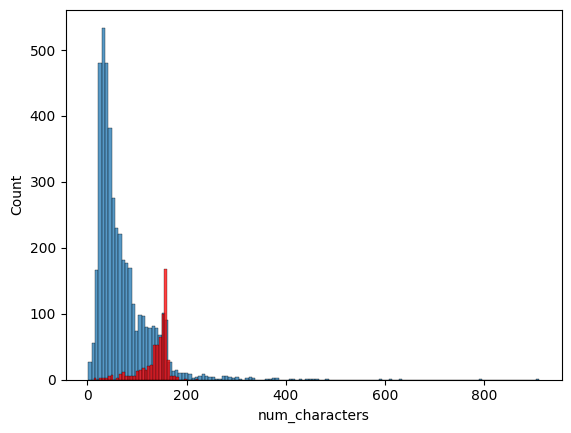

In [ ]:
plt.figure()
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

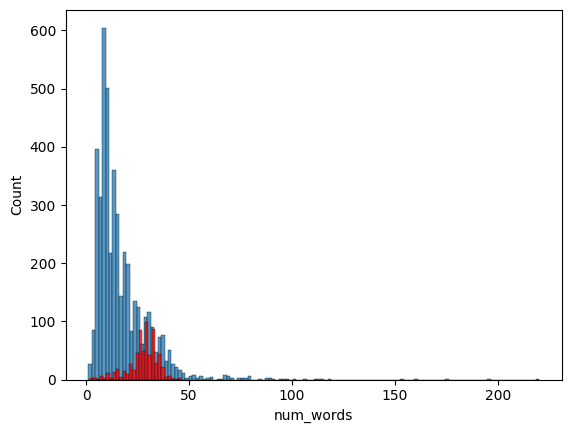

In [ ]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

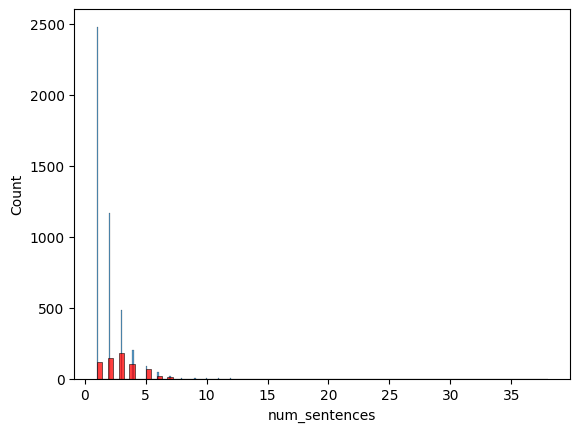

In [ ]:
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

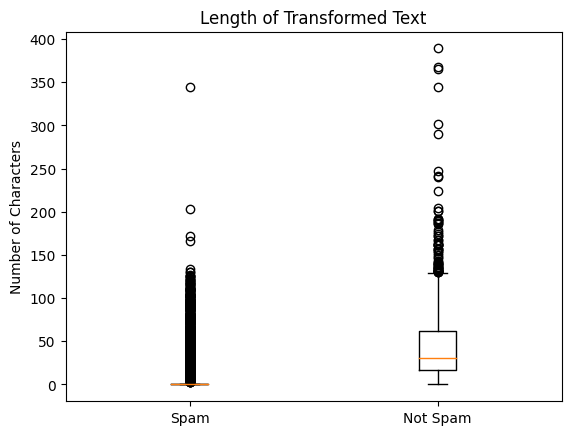

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into a DataFrame called df

# Filter the dataset based on the target variable
spam_data = df[df['target'] == 1]  # Data where target is 1 (spam)
not_spam_data = df[df['target'] == 0]  # Data where target is 0 (not spam)

# Create a boxplot for the length of transformed text
plt.boxplot([spam_data['transformed_text'].apply(len), not_spam_data['transformed_text'].apply(len)])
plt.title('Length of Transformed Text')
plt.xticks([1, 2], ['Spam', 'Not Spam'])
plt.ylabel('Number of Characters')
plt.show()

spam have higher character count than not spam

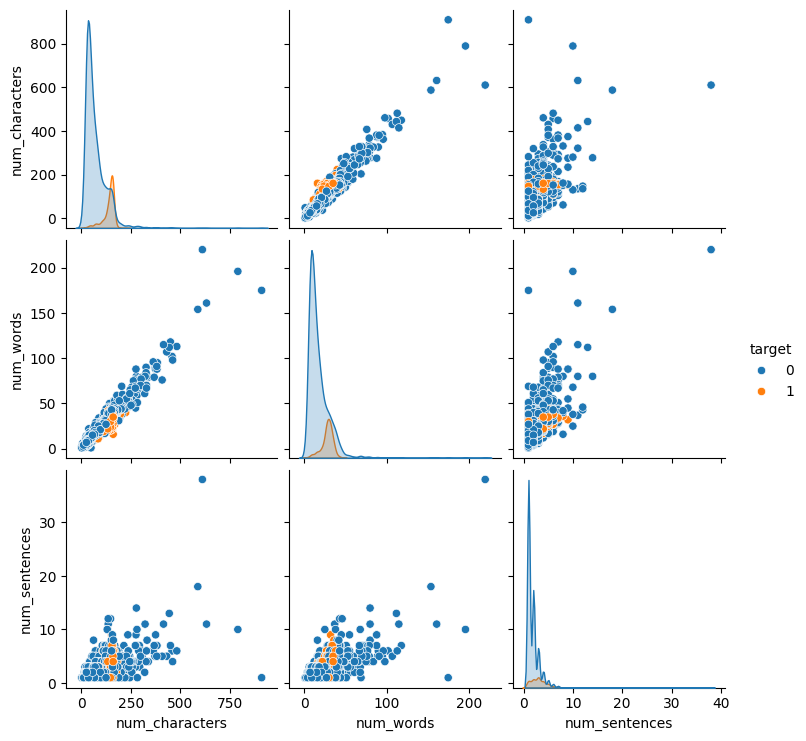

In [ ]:
sns.pairplot(df,hue='target')

<Axes: >

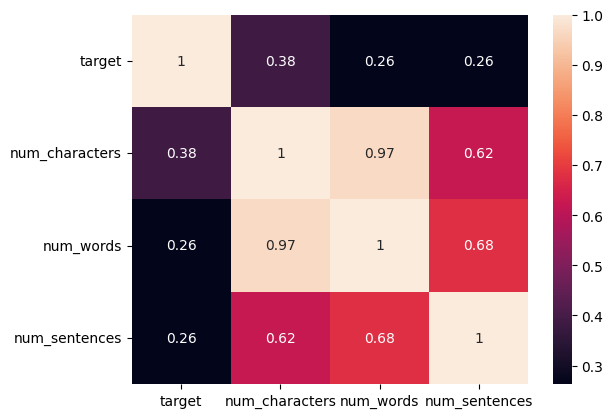

In [ ]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

BAHOT STRONG CORELATION HAI NUMCHAR NUMWORDS AUR NUMSENTENCES KEI BEECH MAI AGAR RKHNA HAI TOH KOI EK HI RKHOGE(NUMCHAR)

we learn about outliers from this pairplot

Data Preprocessing
what to do:
1.  lower case conversion of all characters
2.  tokenize/break into worda
4. remove special characters
5. remove useless words
6. remove punctuation
7. stemming/extracting base words out of tenses

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    x = []
    for i in text:
        if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
              x.append(ps.stem(i))

    return " ".join(x)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,transformed_text,text_length
0,0,go jurong point crazi avail bugi n great world...,76
1,0,ok lar joke wif u oni,21
2,1,free entri 2 wkli comp win fa cup final tkt 21...,127
3,0,u dun say earli hor u c alreadi say,35
4,0,nah think goe usf live around though,36


text transformation is complete

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline
import pandas as pd

# Assuming you have already preprocessed your data and defined your features and target variable

# Define your features and target
features = ['text', 'num_characters']
target = 'target'

# Define a preprocessor for text features
text_preprocessor = Pipeline([
    ('tfidf', TfidfVectorizer()),
])

# Define a preprocessor for numeric features
numeric_preprocessor = Pipeline([
    ('scaler', StandardScaler()),
])

# Combine preprocessors
preprocessor = ColumnTransformer([
    ('text', text_preprocessor, 'text'),
    ('numeric', numeric_preprocessor, ['num_characters']),
])

# Custom transformer to apply abs only to numeric columns
def abs_transform_numeric(X):
    return abs(X)

# Create the pipeline
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('abs_transform', FunctionTransformer(abs_transform_numeric)),  # Apply absolute transformation to numeric columns only
    ('selector', SelectKBest(score_func=chi2, k='all')),  # You can adjust k based on feature selection results
    ('smote', SMOTE()),  # Apply SMOTE for oversampling
])

# Apply SMOTE oversampling
X_resampled, y_resampled = pipeline.fit_resample(df[features], df[target])

# Convert resampled data to DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=[target])
resampled_df['target'] = y_resampled
resampled_df['transformed_text'] =df['transformed_text']
df=resampled_df


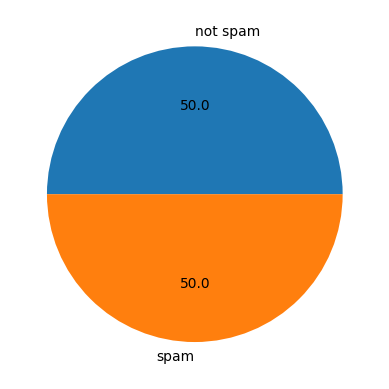

In [ ]:
#checking percentage of data outputs
import matplotlib.pyplot as plt
plt.pie(df[target].value_counts(), labels=['not spam','spam'],autopct="%0.1f")
plt.show()

In [ ]:
df.describe()

,target
count,9032.000000
mean,0.500000
std,0.500028
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
print(df.columns)

Index(['target', 'transformed_text'], dtype='object')


In [ ]:
#jo transformed text hamne banaya hai usse string nikaal rahe hain aur space mai concatenate kar rahe hain
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

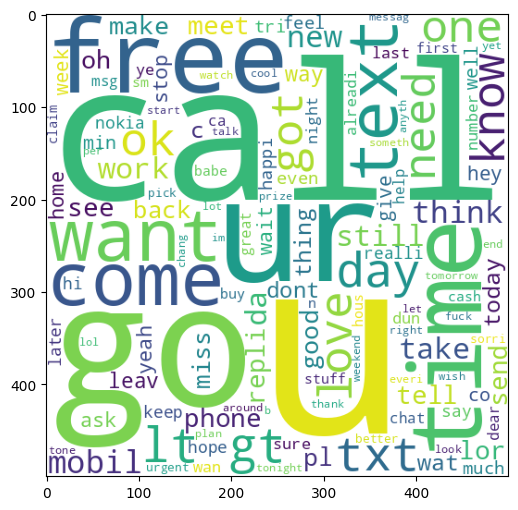

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
notspam_wc= wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

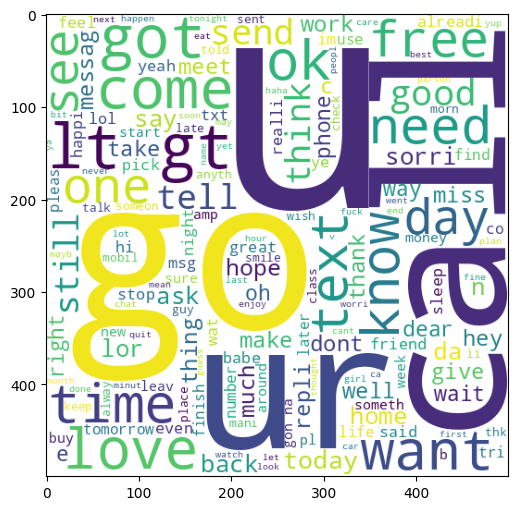

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(notspam_wc)

finding the 30 most common words in both spam and not spam

In [ ]:
spam_words = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    if isinstance(msg, str):  # Check if the message is a string
        for word in msg.split():
            spam_words.append(word)
len(spam_words)


8325

In [ ]:
from collections import Counter

histogram for spam words with their frequency

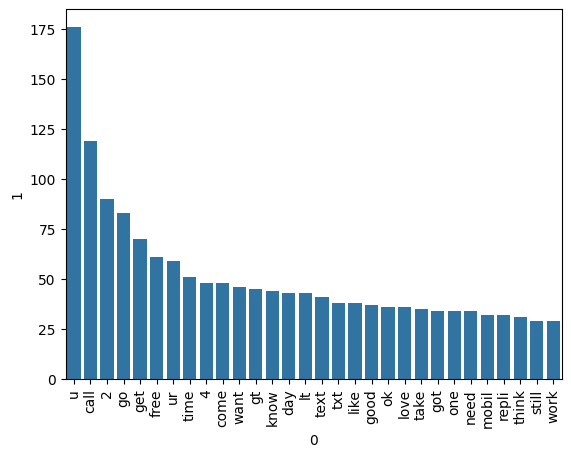

In [ ]:
sns.barplot(x = pd.DataFrame(Counter(spam_words).most_common(30))[0],y = pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
ham_words = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    if isinstance(msg, str):  # Check if the message is a string
        for word in msg.split():
            ham_words.append(word)

len(ham_words)


37018

histogram for non spam words with their frequency

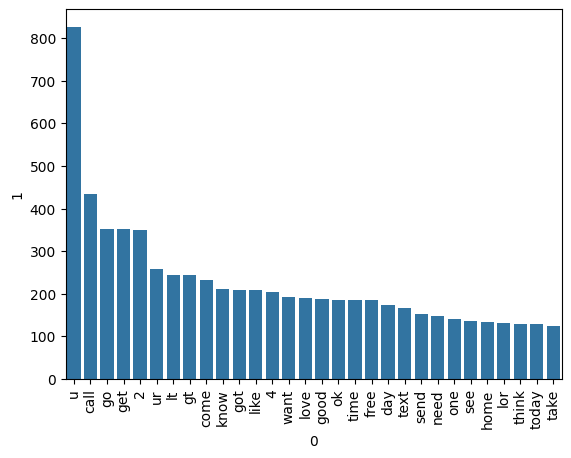

In [ ]:
sns.barplot(x = pd.DataFrame(Counter(ham_words).most_common(30))[0], y = pd.DataFrame(Counter(ham_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

Building the Model now
ML models work only on numbers and our input is in words, so we first need to convert the text into numbers, ie, vectorize it

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
#count and tfid are two different methods
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

trying GaussianNB, MultinomialNb and BernaulliNB using CountVectorizer first

Important Note : we need to prioritize precision here as we do not want to classify non spam emails as spam

In [ ]:
# Replace NaN values with an empty string
df['transformed_text'] = df['transformed_text'].fillna('')

# Now you can fit the CountVectorizer
x = cv.fit_transform(df['transformed_text']).toarray()
x.shape


(9032, 6708)

In [ ]:
y = df['target'].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

Accuracy: 0.6923076923076923
Confusion Matrix:
[[440 466]
 [ 90 811]]
Precision: 0.6350822239624119


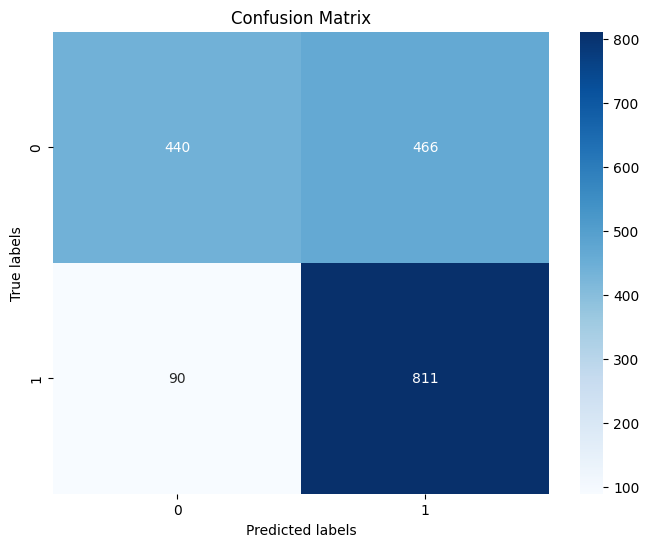

In [ ]:
#gnb
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, cmap="Blues",fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

not good

Accuracy: 0.7802988378527946
Confusion Matrix:
[[650 256]
 [141 760]]
Precision: 0.7480314960629921


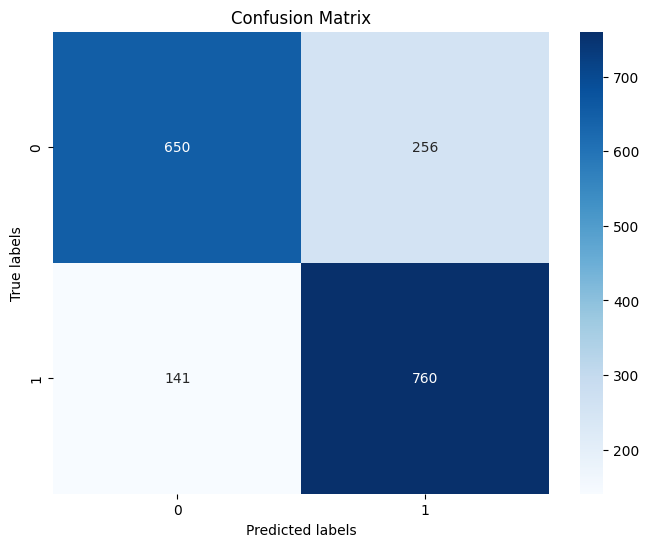

In [ ]:
#mnb
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, cmap="Blues",fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

meh

Accuracy: 0.7399003873824018
Confusion Matrix:
[[548 358]
 [112 789]]
Precision: 0.6878814298169137


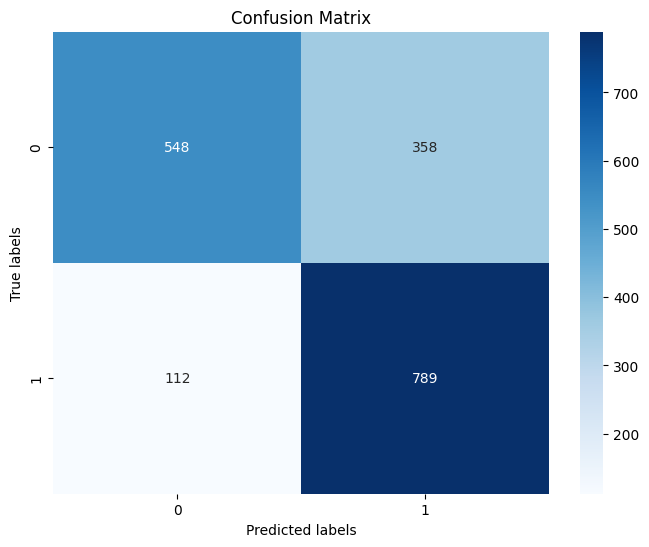

In [ ]:
#bnb
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, cmap="Blues",fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

can be a candidate

using tfid now on all three

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(9032, 3000)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

Accuracy: 0.6939679026009962
Confusion Matrix:
[[445 461]
 [ 92 809]]
Precision: 0.637007874015748


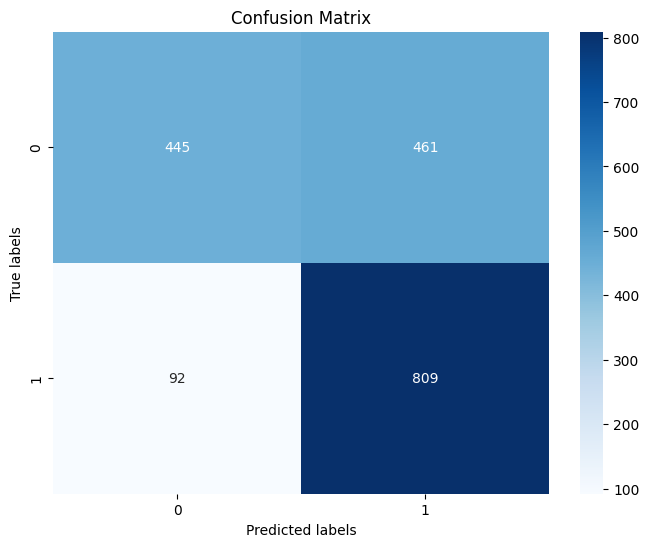

In [ ]:
#gnb
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, cmap="Blues",fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

still not good

Accuracy: 0.7858328721638074
Confusion Matrix:
[[653 253]
 [134 767]]
Precision: 0.7519607843137255


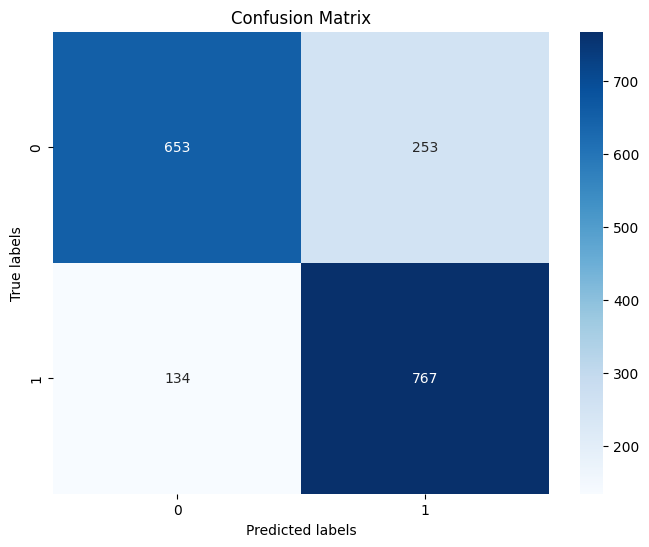

In [ ]:
#mnb
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, cmap="Blues",fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

best precision

Accuracy: 0.7559490868843387
Confusion Matrix:
[[593 313]
 [128 773]]
Precision: 0.7117863720073665


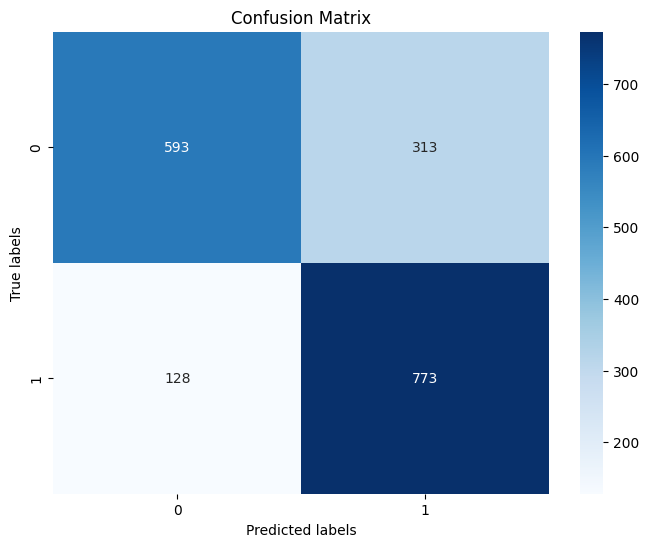

In [ ]:
#bnb
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, cmap="Blues",fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

so tfidf and mnb are choosen

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KNN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'XGB':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.8173768677365799, 0.8127053669222344)

For SVC
Accuracy - 0.8173768677365799
Precision - 0.8127053669222344


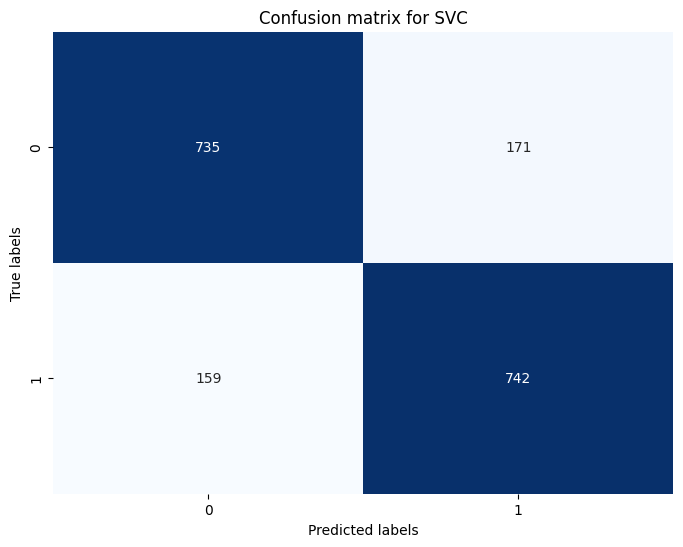

For KNN
Accuracy - 0.5572772551189817
Precision - 0.5304033714629741


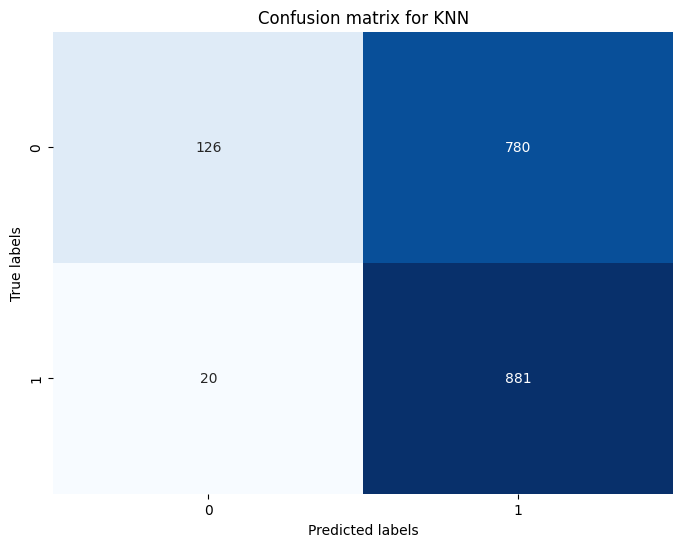

For NB
Accuracy - 0.7858328721638074
Precision - 0.7519607843137255


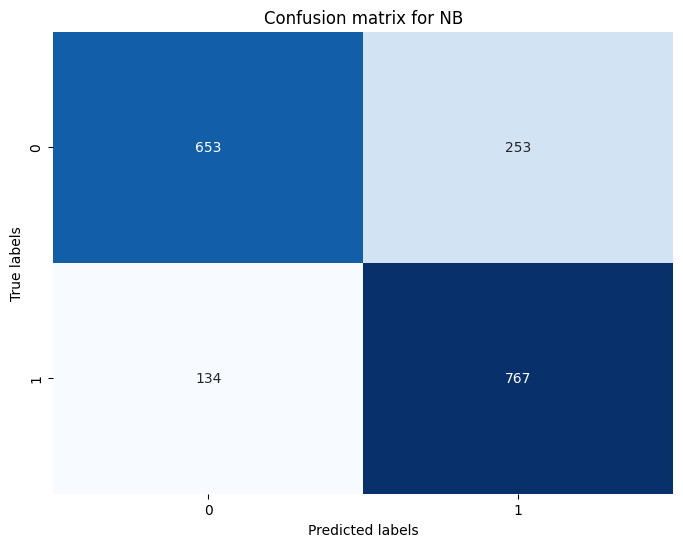

For DT
Accuracy - 0.5987825124515772
Precision - 0.5579710144927537


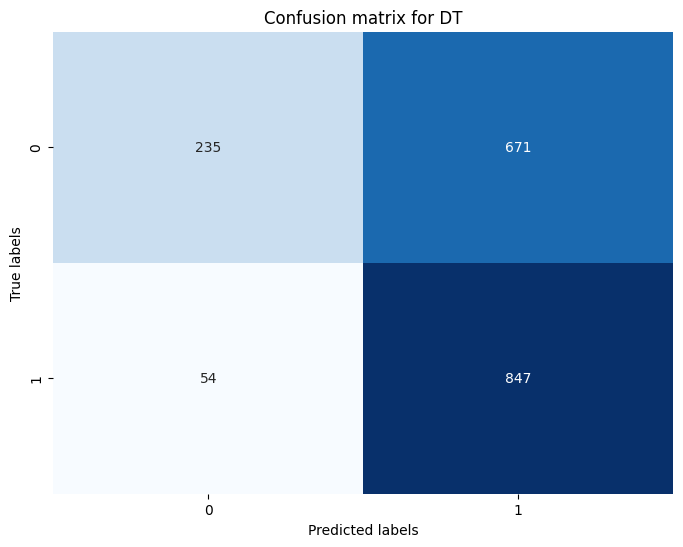

For LR
Accuracy - 0.7919203099059214
Precision - 0.7632898696088265


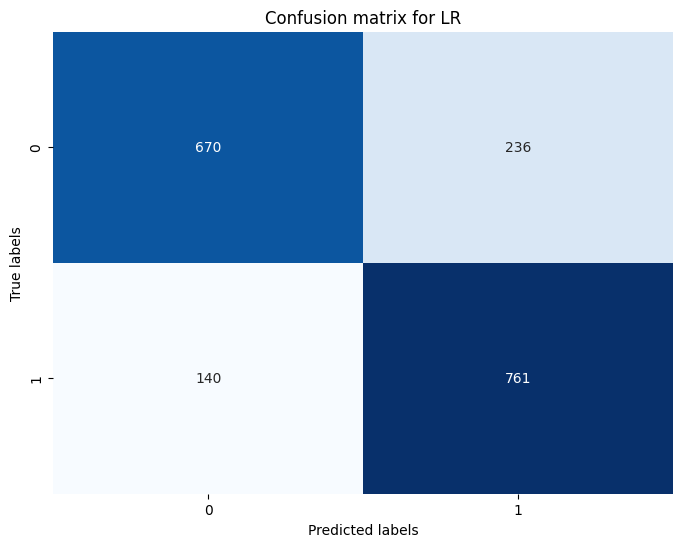

For RF
Accuracy - 0.8411732152739347
Precision - 0.8520642201834863


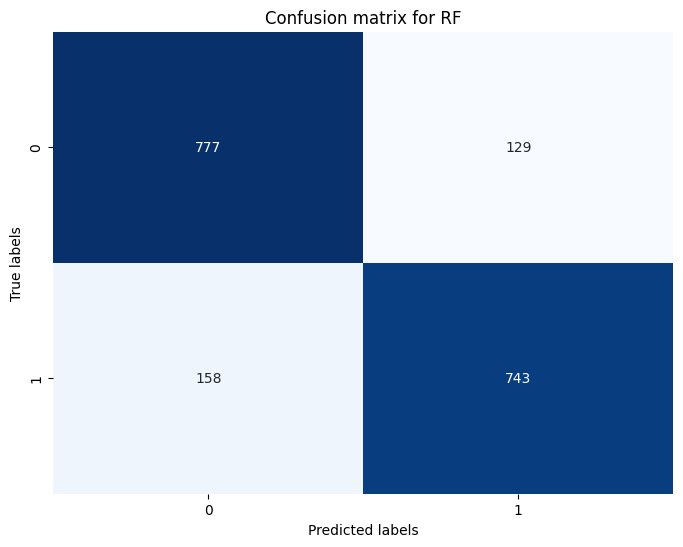

For AdaBoost
Accuracy - 0.7515218594355285
Precision - 0.7058287795992714


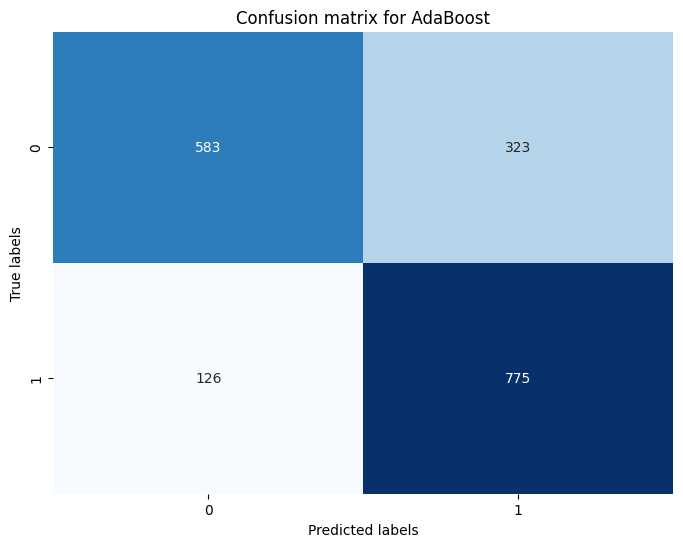

For BgC
Accuracy - 0.8339789706696181
Precision - 0.8357541899441341


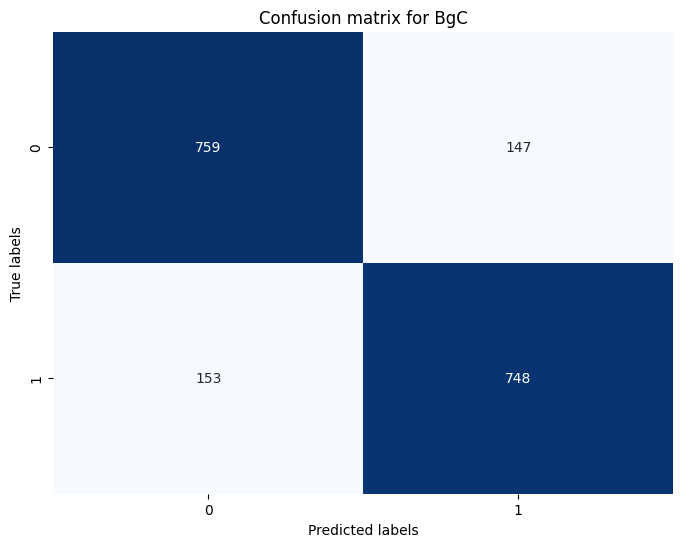

For ETC
Accuracy - 0.8400664084117322
Precision - 0.8549883990719258


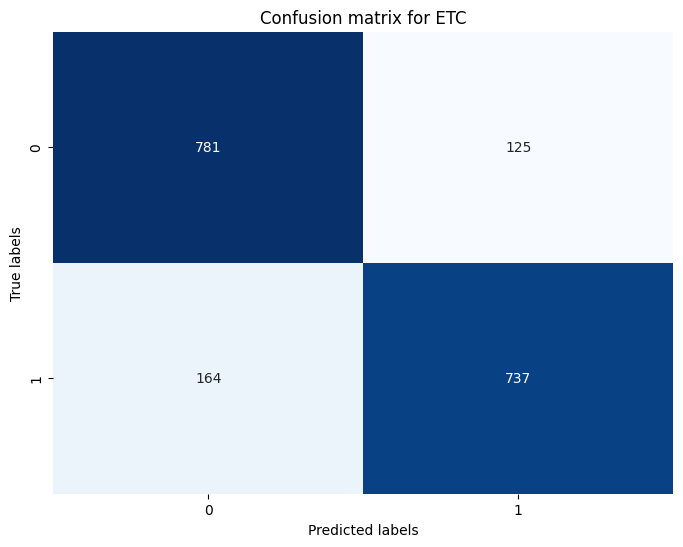

For GBDT
Accuracy - 0.7327061427780852
Precision - 0.6792452830188679


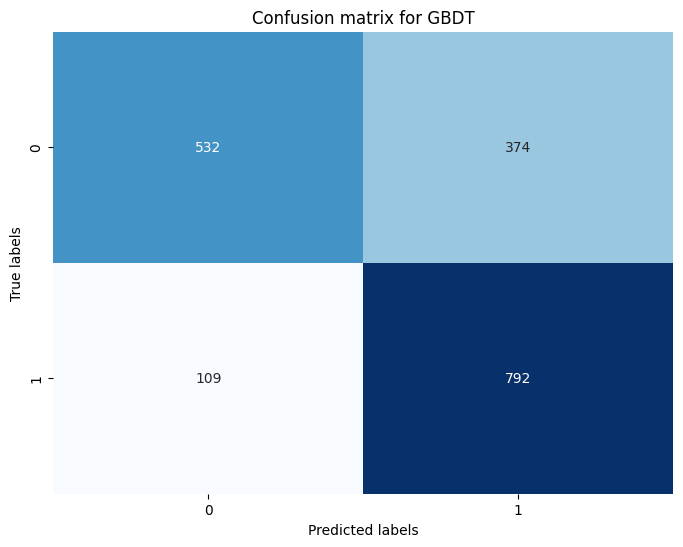

For XGB
Accuracy - 0.7786386275594909
Precision - 0.7387988560533841


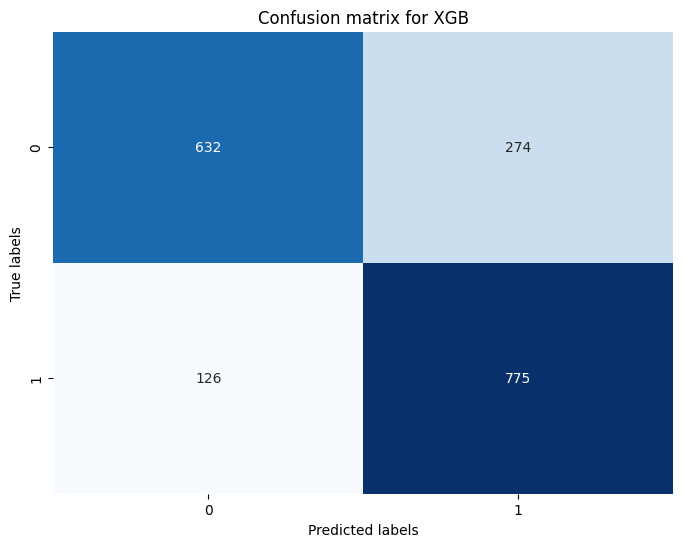

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, clf.predict(X_test))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion matrix for {name}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.840066,0.854988
5,RF,0.841173,0.852064
7,BgC,0.833979,0.835754
0,SVC,0.817377,0.812705
4,LR,0.791920,0.763290
2,NB,0.785833,0.751961
10,XGB,0.778639,0.738799
6,AdaBoost,0.751522,0.705829
9,GBDT,0.732706,0.679245
3,DT,0.598783,0.557971


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [ ]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.840066
1,RF,Accuracy,0.841173
2,BgC,Accuracy,0.833979
3,SVC,Accuracy,0.817377
4,LR,Accuracy,0.791920
5,NB,Accuracy,0.785833
6,XGB,Accuracy,0.778639
7,AdaBoost,Accuracy,0.751522
8,GBDT,Accuracy,0.732706
9,DT,Accuracy,0.598783


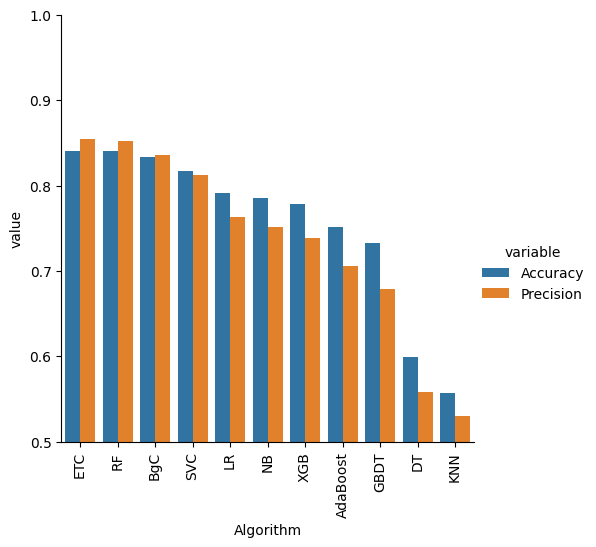

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()